In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# %env "WANDB_NOTEBOOK_NAME" "wandb_test"
# %env WANDB_SILENT=True

import os
from dotenv import load_dotenv

load_dotenv()

os.environ["WANDB_NOTEBOOK_NAME"] = "./wandb_test.ipynb"

WANDB_USER_NAME = os.environ.get("WANDB_USER_NAME", None)

if WANDB_USER_NAME is None:
    raise ValueError("WANDB_USER_NAME environment variable is not set.")

In [6]:
import wandb

wandb.login()

True

In [ ]:
project_name = "wandb-test-project_1"


run = wandb.init(
    project=project_name,
    config={
        "dim_reduction": "UMAP",
        "reduced_dimension": 2,
        "dataset": "OurMixed Dataset",
        "dataset_size": 1000,
    },
    # name="wandb-test-run_1",
)

# run.display(height=720)

# %%wandb

In [ ]:
if wandb.run is not None:
    wandb.finish()

## Get data with api


### Playground


In [ ]:
import pandas as pd
import wandb

# project_name = "related-work"
project_name = "6-protein-family-2-step"
# project_name = "ataberk-zinc15-zinc15-minor-targets"

api = wandb.Api()
runs = api.runs(WANDB_USER_NAME + "/" + project_name)

summary_list, config_list, name_list = [], [], []
for run in runs:
    summary_list.append(run.summary._json_dict)
    config_list.append({k: v for k, v in run.config.items() if not k.startswith("_")})
    name_list.append(run.name)

runs_df = pd.DataFrame(
    {"summary": summary_list, "config": config_list, "name": name_list}
)

runs_df

In [27]:
sample_run = runs[20]

sample_history = sample_run.history()
# sample_run.scan_history()
sample_history

,_runtime,calinski-harabasz-index,mutual-info-index,completeness-index,_step,n_clusters,homogeneity-index,Cluster Calculated Labels,_timestamp,silhouette,davies-bouldin,adjusted-rand-index,Original Labels
0,17.292670,NaN,NaN,NaN,0,NaN,NaN,None,1.692888e+09,NaN,NaN,NaN,"{'format': 'png', 'path': 'media/images/Origin..."
1,18.740970,NaN,NaN,NaN,1,NaN,NaN,"{'height': 500, 'width': 700, '_type': 'image-...",1.692888e+09,NaN,NaN,NaN,None
2,18.780240,NaN,NaN,NaN,2,4.0,NaN,None,1.692888e+09,NaN,NaN,2.515609e-07,None
3,18.785234,1.541199,NaN,NaN,3,4.0,NaN,None,1.692888e+09,NaN,NaN,NaN,None
4,18.795905,NaN,NaN,0.023341,4,4.0,NaN,None,1.692888e+09,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,83.077902,NaN,NaN,NaN,204,48.0,0.001827,None,1.692888e+09,NaN,NaN,NaN,None
205,83.095294,NaN,0.001585,NaN,205,48.0,NaN,None,1.692888e+09,NaN,NaN,NaN,None
206,83.147223,NaN,NaN,NaN,206,48.0,NaN,None,1.692888e+09,-0.700158,NaN,NaN,None
207,84.484730,NaN,NaN,NaN,207,NaN,NaN,None,1.692888e+09,NaN,NaN,NaN,"{'height': 500, 'width': 700, '_type': 'image-..."


In [28]:
# Directly to csv

# system_metrics = sample_run.history(stream="events")
# system_metrics.to_csv("sys_metrics.csv")

In [83]:
metric_name = "silhouette"
metric_x_index_name = "n_clusters"


# Is metric_name and metric_x_index_name both exist in sample_history
metric_name not in sample_history or metric_x_index_name not in sample_history

False

In [ ]:
reduced_sample_history = (
    sample_history[[metric_x_index_name, metric_name]].dropna().reset_index(drop=True)
)
reduced_sample_history[metric_x_index_name] = reduced_sample_history[
    metric_x_index_name
].astype(int)
reduced_sample_history["name"] = sample_run.name
reduced_sample_history

### Actual Code


In [16]:
from thesis_work.utils.wandb_api import (
    get_project_summary,
    get_metric_from_project,
    plot_metric_from_project,
)

# project_name = "related-work"
project_name = "6-protein-family-2-step"

metric = "silhouette"
# metric = "calinski-harabasz-index"
# metric = "davies-bouldin"

metric_x_index_name = "n_clusters"

filter_column_contains_substring = "_UMAP_16"

In [17]:
result = get_metric_from_project(
    project_name=project_name,
    metric=metric,
    metric_x_index_name=metric_x_index_name,
    filter_column_contains_substring=filter_column_contains_substring,
)
result

,n_clusters,silhouette,name
0,4,0.468,AGGLOMERATIVE_ecfp_UMAP_16
1,6,0.453,AGGLOMERATIVE_ecfp_UMAP_16
2,8,0.446,AGGLOMERATIVE_ecfp_UMAP_16
3,10,0.439,AGGLOMERATIVE_ecfp_UMAP_16
4,12,0.432,AGGLOMERATIVE_ecfp_UMAP_16
...,...,...,...
133,40,0.309,K-MEANS_ChemBERTa-77M-MTR_UMAP_16
134,42,0.305,K-MEANS_ChemBERTa-77M-MTR_UMAP_16
135,44,0.307,K-MEANS_ChemBERTa-77M-MTR_UMAP_16
136,46,0.311,K-MEANS_ChemBERTa-77M-MTR_UMAP_16


#### Plotting


In [18]:
processed_result = result


# processed_result = result[result["name"].str.contains("UMAP_16")]
# processed_result.assign(base=processed_result['name'].apply(lambda x: 16 if '16' in x else 32))

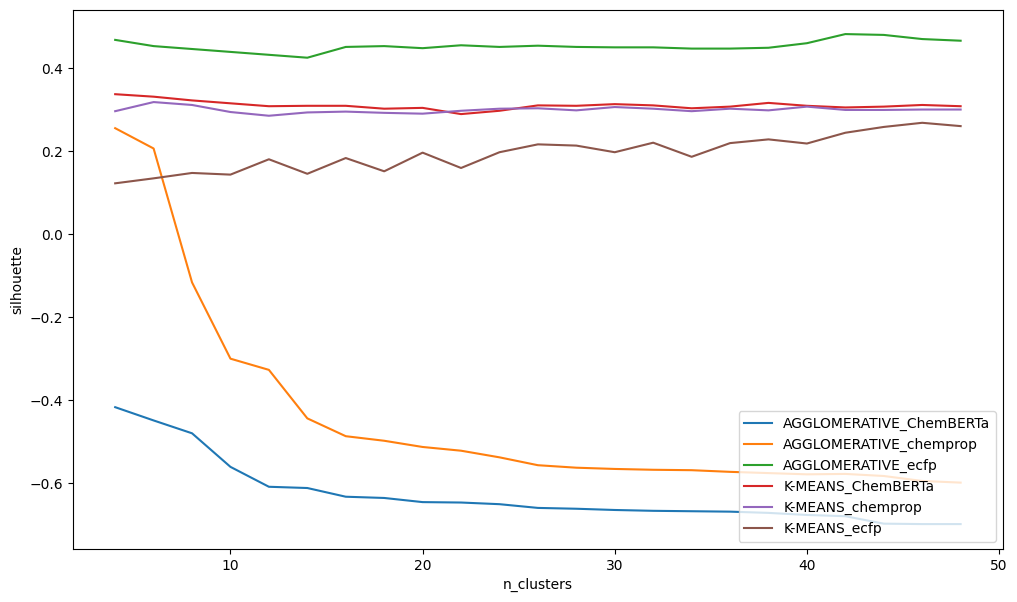

In [26]:
fig = plot_metric_from_project(
    df=processed_result,
    metric=metric,
    metric_x_index_name=metric_x_index_name,
    filter_column_contains_substring=filter_column_contains_substring,
    show_title=False,
    method="matplotlib",
    # save_path="./test.png",
)

fig

In [23]:
xx = "safsdfasd"
xx.replace("dddd", "")


'safsdfas'